#**Task 1 - Data Extraction & Initial Analysis**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bcg-task1-data.csv')

# Exploratory data analysis

In [3]:
df.shape

(9, 7)

In [4]:
df.head(10)

,company,fiscal_year,total_revenue,net_income,total_assets,total_liabilities,cash_flow_operating_activities
0,Microsoft,2024,211914,88136,411543,198265,118548
1,Microsoft,2023,198270,72361,384620,183512,87582
2,Microsoft,2022,184903,72738,364840,173422,89035
3,Tesla,2024,97690,7153,122070,125665,14923
4,Tesla,2023,96773,14974,106618,140473,13256
5,Tesla,2022,81462,12587,82338,127855,14724
6,Apple,2024,391035,93736,364980,308030,118254
7,Apple,2023,383285,96995,352583,290437,110543
8,Apple,2022,394328,99803,352755,302083,122151


In [5]:
print(df.columns)
print(df.dtypes)

Index(['company', 'fiscal_year', 'total_revenue', 'net_income', 'total_assets',
       'total_liabilities', 'cash_flow_operating_activities'],
      dtype='object')
company                           object
fiscal_year                        int64
total_revenue                      int64
net_income                         int64
total_assets                       int64
total_liabilities                  int64
cash_flow_operating_activities     int64
dtype: object


In [6]:
df.describe()

,fiscal_year,total_revenue,net_income,total_assets,total_liabilities,cash_flow_operating_activities
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2023.000000,226628.888889,62053.666667,282483.000000,205526.888889,76557.333333
std,0.866025,130870.411716,39095.864110,135668.665611,75208.596320,48272.769855
min,2022.000000,81462.000000,7153.000000,82338.000000,125665.000000,13256.000000
25%,2022.000000,97690.000000,14974.000000,122070.000000,140473.000000,14923.000000
50%,2023.000000,198270.000000,72738.000000,352755.000000,183512.000000,89035.000000
75%,2024.000000,383285.000000,93736.000000,364980.000000,290437.000000,118254.000000
max,2024.000000,394328.000000,99803.000000,411543.000000,308030.000000,122151.000000


In [7]:
df = df.sort_values(by=['company', 'fiscal_year'])

# Visualizations


In [8]:
def plot_financial_metrics(metric, title, ylabel):
    plt.figure(figsize=(6, 4))
    for company in df['company'].unique():
        company_data = df[df['company'] == company]
        plt.bar(company_data['fiscal_year'] + (0.2 * df['company'].unique().tolist().index(company)),
                company_data[metric], width=0.2, label=company)

    plt.xlabel("Fiscal Year")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(df['fiscal_year'].unique())  # Set x-ticks as fiscal years
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

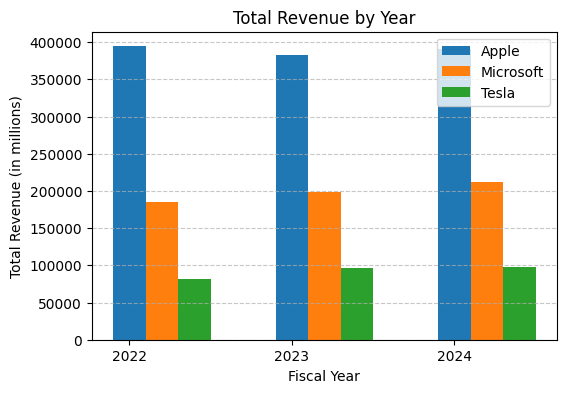

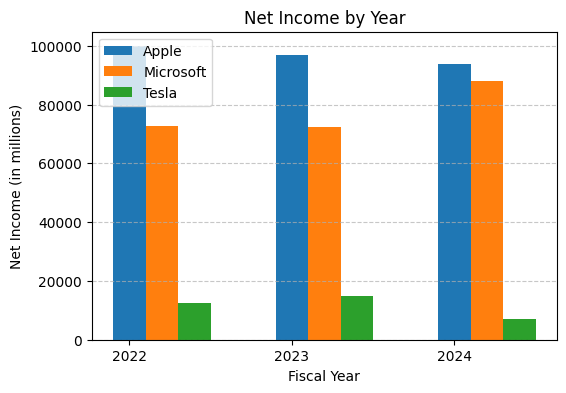

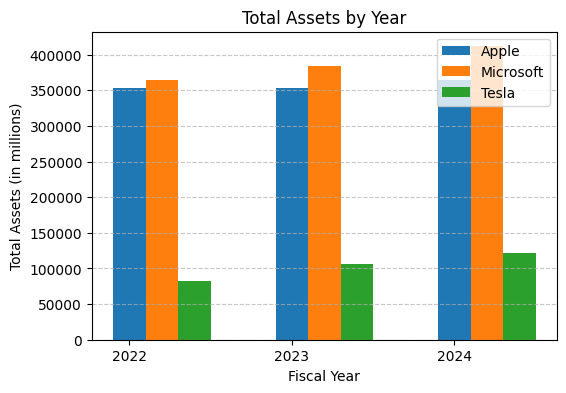

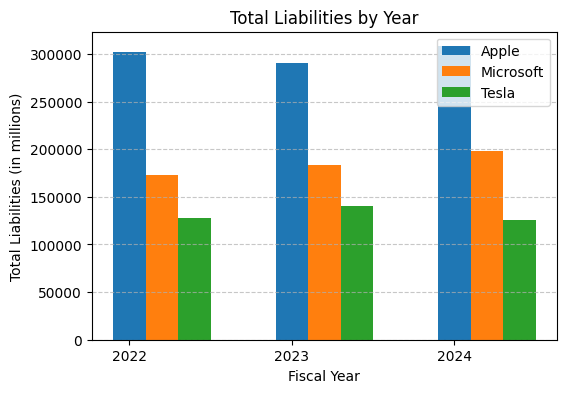

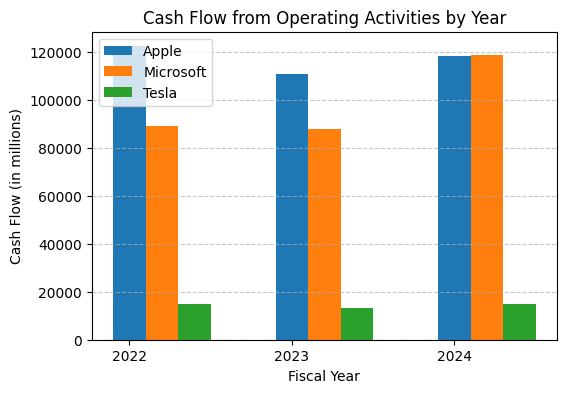

In [9]:
plot_financial_metrics('total_revenue', "Total Revenue by Year", "Total Revenue (in millions)")
plot_financial_metrics('net_income', "Net Income by Year", "Net Income (in millions)")
plot_financial_metrics('total_assets', "Total Assets by Year", "Total Assets (in millions)")
plot_financial_metrics('total_liabilities', "Total Liabilities by Year", "Total Liabilities (in millions)")
plot_financial_metrics('cash_flow_operating_activities', "Cash Flow from Operating Activities by Year", "Cash Flow (in millions)")

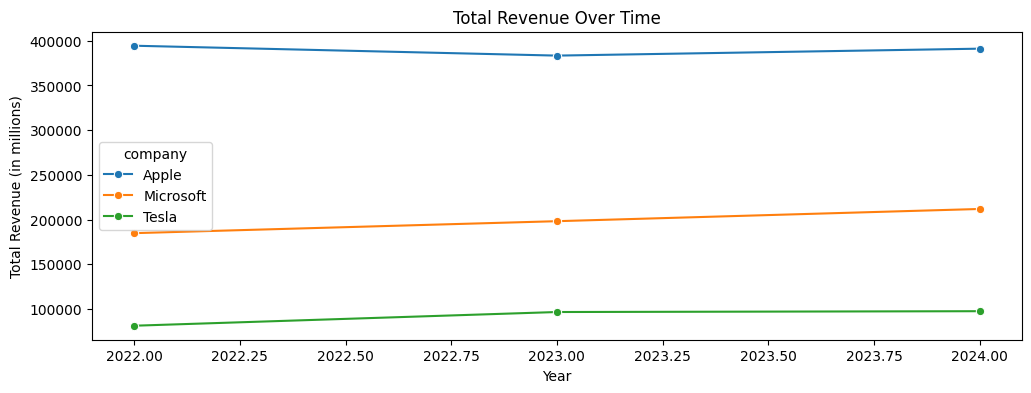

In [10]:
# Line chart for total revenue over time
plt.figure(figsize=(12,4))

sns.lineplot(data=df, x='fiscal_year', y='total_revenue', hue='company', marker='o')
plt.title('Total Revenue Over Time')

plt.ylabel('Total Revenue (in millions)')

plt.xlabel('Year')

plt.grid(False)

plt.show()


# Analyzing trends with pandas:

In [11]:
df['Revenue Growth (%)'] = df.groupby('company')['total_revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('company')['net_income'].pct_change() * 100
df['Total Assets Growth (%)'] = df.groupby('company')['total_assets'].pct_change() * 100
df['Total Liabilities Growth (%)'] = df.groupby('company')['total_liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('company')['cash_flow_operating_activities'].pct_change() * 100

In [12]:
df

,company,fiscal_year,total_revenue,net_income,total_assets,total_liabilities,cash_flow_operating_activities,Revenue Growth (%),Net Income Growth (%),Total Assets Growth (%),Total Liabilities Growth (%),Cash Flow Growth (%)
8,Apple,2022,394328,99803,352755,302083,122151,NaN,NaN,NaN,NaN,NaN
7,Apple,2023,383285,96995,352583,290437,110543,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992
6,Apple,2024,391035,93736,364980,308030,118254,2.021994,-3.359967,3.516052,6.057424,6.975566
2,Microsoft,2022,184903,72738,364840,173422,89035,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2023,198270,72361,384620,183512,87582,7.229196,-0.518299,5.421555,5.818178,-1.631942
0,Microsoft,2024,211914,88136,411543,198265,118548,6.881525,21.800417,6.999896,8.039256,35.356580
5,Tesla,2022,81462,12587,82338,127855,14724,NaN,NaN,NaN,NaN,NaN
4,Tesla,2023,96773,14974,106618,140473,13256,18.795267,18.964010,29.488207,9.868992,-9.970117
3,Tesla,2024,97690,7153,122070,125665,14923,0.947578,-52.230533,14.492862,-10.541528,12.575438


In [13]:
df.fillna(0, inplace=True)

In [14]:
df

,company,fiscal_year,total_revenue,net_income,total_assets,total_liabilities,cash_flow_operating_activities,Revenue Growth (%),Net Income Growth (%),Total Assets Growth (%),Total Liabilities Growth (%),Cash Flow Growth (%)
8,Apple,2022,394328,99803,352755,302083,122151,0.000000,0.000000,0.000000,0.000000,0.000000
7,Apple,2023,383285,96995,352583,290437,110543,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992
6,Apple,2024,391035,93736,364980,308030,118254,2.021994,-3.359967,3.516052,6.057424,6.975566
2,Microsoft,2022,184903,72738,364840,173422,89035,0.000000,0.000000,0.000000,0.000000,0.000000
1,Microsoft,2023,198270,72361,384620,183512,87582,7.229196,-0.518299,5.421555,5.818178,-1.631942
0,Microsoft,2024,211914,88136,411543,198265,118548,6.881525,21.800417,6.999896,8.039256,35.356580
5,Tesla,2022,81462,12587,82338,127855,14724,0.000000,0.000000,0.000000,0.000000,0.000000
4,Tesla,2023,96773,14974,106618,140473,13256,18.795267,18.964010,29.488207,9.868992,-9.970117
3,Tesla,2024,97690,7153,122070,125665,14923,0.947578,-52.230533,14.492862,-10.541528,12.575438


In [15]:
df.to_csv('final-data-report-task1.csv')

In [16]:
summary = df.groupby('company').agg({
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean',
    'Total Assets Growth (%)' : 'mean',
    'Total Liabilities Growth (%)' : 'mean',
    'Cash Flow Growth (%)' :'mean'
}).reset_index()


In [17]:
print("Overall Growth/Fall rate for Apple, Microsoft and Tesla from Fiscal Year 2022 - 2024")
summary

Overall Growth/Fall rate for Apple, Microsoft and Tesla from Fiscal Year 2022 - 2024


,company,Revenue Growth (%),Net Income Growth (%),Total Assets Growth (%),Total Liabilities Growth (%),Cash Flow Growth (%)
0,Apple,-0.259489,-2.057837,1.155764,0.734064,-0.842475
1,Microsoft,4.703574,7.094040,4.140484,4.619145,11.241546
2,Tesla,6.580948,-11.088841,14.660357,-0.224178,0.868440


In [18]:
summary.to_csv('growth_report.csv')

In [19]:
def plot_growth_trends(metric, title, ylabel):
    plt.figure(figsize=(8, 5))
    for company in df["company"].unique():
        company_data = df[df["company"] == company]
        plt.plot(company_data["fiscal_year"], company_data[metric], marker="o", label=company)

    plt.xlabel("Fiscal Year")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(sorted(df["fiscal_year"].unique()))
    plt.legend()
    plt.grid(True)
    plt.show()


In [20]:
print(df['fiscal_year'].unique())


[2022 2023 2024]


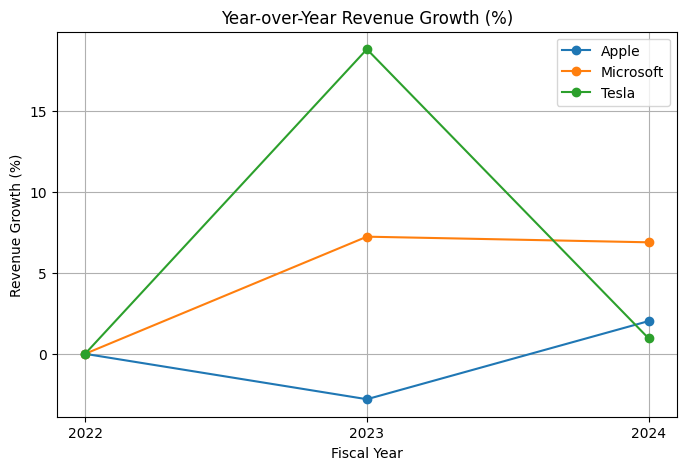

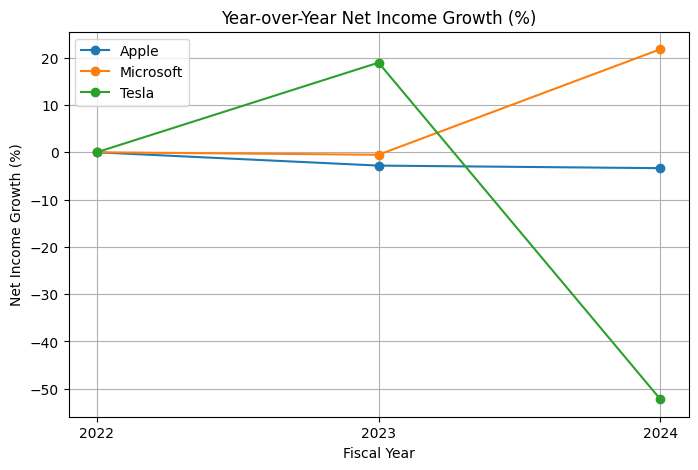

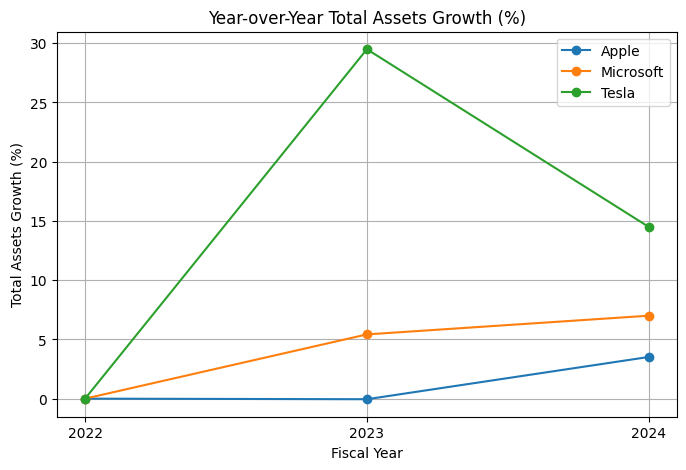

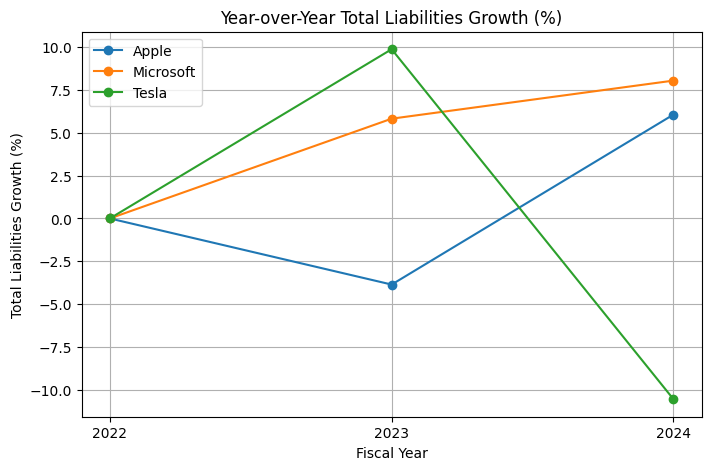

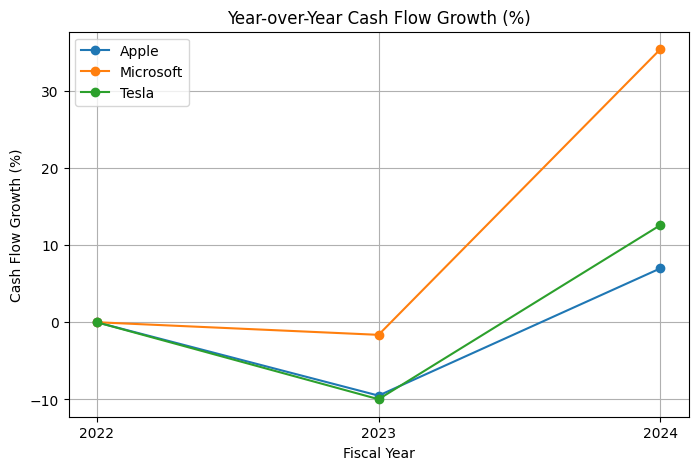

In [21]:
plot_growth_trends('Revenue Growth (%)', "Year-over-Year Revenue Growth (%)", "Revenue Growth (%)")
plot_growth_trends('Net Income Growth (%)', "Year-over-Year Net Income Growth (%)", "Net Income Growth (%)")
plot_growth_trends('Total Assets Growth (%)', "Year-over-Year Total Assets Growth (%)", "Total Assets Growth (%)")
plot_growth_trends('Total Liabilities Growth (%)', "Year-over-Year Total Liabilities Growth (%)", "Total Liabilities Growth (%)")
plot_growth_trends('Cash Flow Growth (%)', "Year-over-Year Cash Flow Growth (%)", "Cash Flow Growth (%)")

# **Financial Performance Analysis (2022-2024)**

### **1. Revenue Growth Trends**
- **Tesla** experienced significant revenue growth in 2023 but saw a decline in 2024.
- **Microsoft** showed steady growth across the years.
- **Apple** had negative revenue growth in 2023 but recovered slightly in 2024.

### **2. Net Income Growth**
- **Tesla** had a sharp increase in net income growth in 2023 but a drastic decline in 2024, suggesting major profitability issues.
- **Microsoft** had consistent positive net income growth, peaking in 2024.
- **Apple** showed slight negative growth in 2023 and remained stable in 2024.

### **3. Total Assets Growth**
- **Tesla** had the highest total assets growth in 2023, but it slowed in 2024.
- **Microsoft** exhibited a steady increase in total assets growth.
- **Apple** had minimal total asset growth in 2023 but showed improvement in 2024.

### **4. Total Liabilities Growth**
- **Tesla** had a surge in liabilities in 2023 but a significant decline in 2024.
- **Microsoft** had continuous liability growth, indicating expansion.
- **Apple** had reduced liabilities in 2023 but increased them again in 2024.

### **5. Cash Flow Growth**
- **Microsoft** experienced a significant surge in cash flow growth in 2024 after a slight decline in 2023.
- **Tesla** and **Apple** both had negative cash flow growth in 2023 but recovered in 2024.

## **Summary**
- **Tesla** showed extreme fluctuations across all metrics, with high growth in 2023 followed by a sharp decline in 2024.
- **Microsoft** demonstrated consistent and steady financial growth across revenue, net income, assets, liabilities, and cash flow.
- **Apple** had a weaker performance in 2023 but saw gradual recovery in 2024, though still trailing behind Microsoft in financial stability.
